In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 11.7 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# define stock ticker and timeframe
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-02-04"

# download data from Yahoo Finance API
df = yf.download(ticker, start=start_date, end=end_date)

# print first 5 rows of data
print(df.head())

[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505280  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516527  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412874  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401019  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443573  447610800


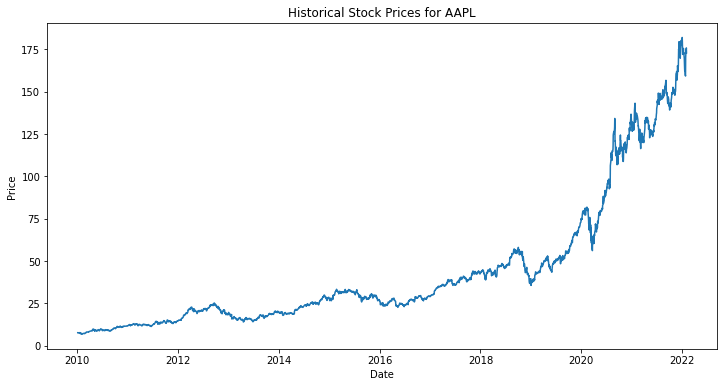

In [4]:
# plot stock prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Historical Stock Prices for {}".format(ticker))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [5]:
# calculate descriptive statistics for stock prices
stats = df['Close'].describe()
print(stats)

count    3044.000000
mean       43.685906
std        39.524223
min         6.858929
25%        18.566161
50%        28.393750
75%        48.900002
max       182.009995
Name: Close, dtype: float64


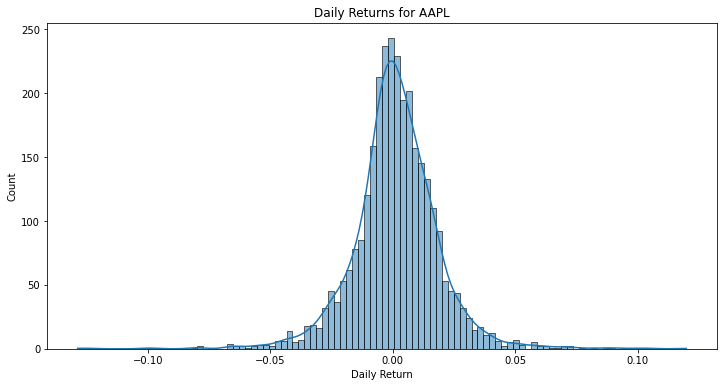

In [6]:
# calculate and plot daily returns
daily_returns = df['Close'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(daily_returns.dropna(), kde=True)
plt.title("Daily Returns for {}".format(ticker))
plt.xlabel("Daily Return")
plt.show()

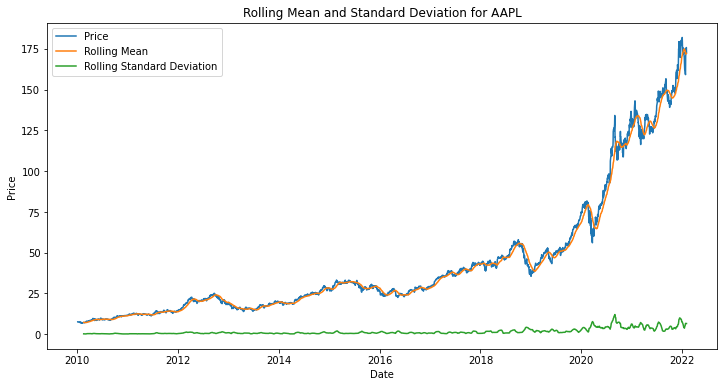

In [7]:
# calculate and plot rolling mean and standard deviation
window_size = 30
rolling_mean = df['Close'].rolling(window_size).mean()
rolling_std = df['Close'].rolling(window_size).std()
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Price')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title("Rolling Mean and Standard Deviation for {}".format(ticker))
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()